# Ejercicio Aplicando PCA: Principal Component Analysis

En este notebook vamos a ver un ejemplo sencillo sobre el uso del PCA. Para ello, utilizaremos un dataset con datos sobre diferentes individuos y un indicador de si está residiendo en una vivienda que ha comprado o lo está haciendo en una de alquiler.

Se tratará de un modelo de clasificación, por lo que podremos utilizar uno de los algoritmos de clasificación vistos con anterioridad. Sin embargo, veremos que tenemos un número elevado de variables, que podremos reducirlo gracias al uso de técnicas de reducción de variables, como el PCA.

### Importamos librerías

Al igual que hemos hecho anteriormente, empezaremos importando las librerías que vamos a utilizar a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Librería nueva para utilizar PCA:
from sklearn.decomposition import PCA

### Cargamos datos de entrada

Los datos de los individuos con un target que nos indique si está en una vivienda comprada o alquilada, son los siguientes:

In [2]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")

dataframe

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


Como podemos ver, son datos numéricos, por lo que no tendremos que realizar ningún tipo de conversión de categóricas.

### Visualicemos las dimensiones

Uno de los pasos principales que siempre decimos que es conveninete realizar, es el análisis de los datos. Para ello, vamos a analizar las distribuciones de los datos en base al target.

### EJERCICIO

1. Utiliza el dataframe que acabamos de importar para realizar la representación del histograma de cada una de las columnas en base al target, es decir, para cada columna, tendremos que ver superpuestos sus histogramas para los individuos "alquilados" frente a los "comprados":

Bien, ya tenemos una primera aproximación a los datos. Sin embargo, podemos seguir analizando los datos para extraer información útil a la hora de entenderlos.

### Correlaciones de los datos

Otro de los puntos interesantes a la hora de analizar los datos puede ser analizar las correlaciones, ya que nos pueden indicar variables similares que estén replicando información o aquellas más importantes en base al target.

### EJERCICIO

1. Representa la matriz de correlación del dataframe mediante un mapa de calor (o ``heatmap``), donde se indique el valor de esta relación.

Si analizamos los datos, podemos ver que existe una fuerte relación entre los ingresos y los ahorros, así como entre los propios ingresos y los gastos comunes, los gastos en vivienda o, incluso, el target.

### EJERCICIO

Realiza un gráfico de dispersión de las relaciones entre los **ingresos** y:
1. Ahorros
2. Gastos comunes
3. Gatos de vivienda
4. Target (comprar)

Hazlo todo en la misma figura, con 4 subgráficos.

Además, resultaría interesante analizar otros gráficos que puede que no tengan una relación lineal, pero que a priori podrían estar relacionados, como:

5. Otros gastos vs. Gastos comunes, donde el target se indique con diferentes colores (que los alquilados sean azules y los comprados rojos, por ejemplo)

Este gráfico realízalo en una figura aparte.

## Normalización y estandarización de los datos

Debido a la naturaleza del PCA, donde la magnitud de las variables gobernará la información que nos aporta cada variable, será muy importante mantener los datos en una misma escala. ¿Recuerdas cómo se hacía?

### EJERCICIO

Normaliza los datos, de forma que el resultado final tenga una media nula y desviación típica unidad. De este modo, reducimos las variables a unas dimensiones que pueden compararse entre sí.

Tras ello, divide los datos en train y test, y aplica un algoritmo KNN para clasificar los datos (con el k que mejor resultado ofrezca). Guarda los resultados en una variable para el futuro:

## Aplicamos PCA

Tras haber normalizado, podemos hacer uso del algoritmo compresor de variables, PCA, como se indica a continuación. Al aplicar el PCA no reducimos las variables automáticamente, sino que nos creamos nuevas variables que van explicando de más a menos varianza del dataset original. Es decir, la primera variable tras aplicar el PCA será la que mayor información del dataset nos explique, la segunda será la que maximice la información del resto de datos, y así sucesivamente hasta que lleguemos a las últimas, que deberían expresar una cantidad mínima de información, pues ya debería estar toda explicada.

Gracias a esto, el paso siguiente sería reducir las variables maximizando la información, lo cual podremos hacer eliminando las últimas variables.

Para aplicar el PCA directamente, tenemos 2 opciones:
1. Hacerlo matemáticamente, planteando la resolución de un determinante, como ya hicimos en el apartado Feature Engineering
2. Aplicar un objeto de sklearn

En este caso, nos quedaremos con la segunda:

In [ ]:
pca = PCA(len(X_cols))

pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print(X_train_scaled.shape)
print(X_train_scaled_pca.shape)

### Varianza explicada

Gracias al objeto PCA, se calculan automáticamente ciertos parámetros:

In [30]:
# Varianza explicada (sobre 1):
pca.explained_variance_ratio_

array([0.28751291, 0.24119835, 0.12164926, 0.10449214, 0.09365655,
       0.06192368, 0.03891419, 0.02897194, 0.02168099])

In [33]:
# Valores singulares/autovalores: relacionados con la varianza explicada
pca.singular_values_

array([19.10114875, 17.49516239, 12.42468953, 11.5152303 , 10.90184194,
        8.86460091,  7.02723993,  6.06344668,  5.24530046])

In [54]:
# Autovectores:
pca.components_

array([[ 0.52578092,  0.34221689, -0.15704606, -0.15672933,  0.48498246,
         0.47441399, -0.19373018, -0.15481427, -0.18825252],
       [-0.23713322, -0.14912244,  0.0288447 , -0.03824028, -0.20237965,
        -0.03347826, -0.47895909, -0.56087783, -0.57721047],
       [ 0.08164864,  0.31852449,  0.52757662, -0.70409178, -0.1960092 ,
        -0.14028703,  0.1914961 , -0.15025218,  0.02113763],
       [ 0.08031286, -0.27280343,  0.78885849,  0.38358873,  0.13304128,
         0.35795276,  0.0461756 , -0.01658641, -0.03811372],
       [ 0.15152795,  0.70678174,  0.15464947,  0.51342016, -0.25823175,
        -0.2764977 , -0.16678465,  0.08494025, -0.10869936],
       [-0.10568483,  0.16189384, -0.19665782,  0.1853687 , -0.23681965,
         0.33574202,  0.73538974, -0.36990247, -0.20773322],
       [-0.1269231 ,  0.07142663, -0.05056556, -0.15606777, -0.54912327,
         0.61423968, -0.24672609,  0.45865522, -0.0425395 ],
       [ 0.04945415,  0.04304702, -0.03928732,  0.09088166, -0

Pasemos a representar ahora esta medida. Para ello, vamos a recurrir a una estructura que vimos hace tiempo:

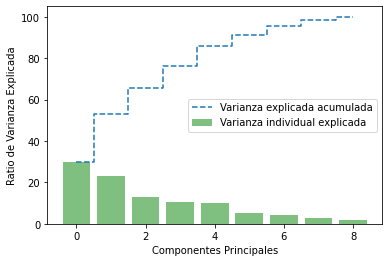

In [143]:
# A partir de los autovalores, calculamos la varianza explicada
var_exp = pca.explained_variance_ratio_*100
cum_var_exp = np.cumsum(pca.explained_variance_ratio_*100)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
plt.figure(figsize=(6, 4))
plt.bar(range(len(pca.explained_variance_ratio_)), var_exp, alpha=0.5, align='center', label='Varianza individual explicada', color='g')
plt.step(range(len(pca.explained_variance_ratio_)), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend()

In [ ]:
# Si queremos obtener cuántas variables necesitamos para cumplir con cierta varianza:
umbral_varianza_min = 90

cum_var_exp = np.cumsum(pca.explained_variance_ratio_*100)
n_var_90 = len(cum_var_exp[cum_var_exp<umbral_varianza_min])
n_var_90

### EJERCICIO

Ahora que tenemos las componentes principales, calcula la correlación entre las nuevas variables entre sí. ¿Tiene sentido lo que sale?

### Predicción basada en PCA

Ahora que tenemos calculadas las nuevas varaibles, vamos a proceder a utilizar el algoritmo que habíamos pensado. Lo único que cambiaremos son las varaibles que vamos a utilizar, que ahora serán un subconjunto de las que hemos obtenido con la conversión PCA. Por seguir un poco con lo visto anteriormente, vamos a quedarnos con las variables que hemos visto que nos reducen los datos manteniendo un 90% de su información.

Tenemos 2 opciones:
1. Seleccionar las n primeras variables de lo que nos devuelve el PCA
2. Invocar el PCA con el valor n de las varaibles que queremos

In [79]:
# 1. Seleccionar las n primeras variables de lo que nos devuelve el PCA:
X_ejercicio_train = X_train_scaled_pca[:, :n_var_90]
X_ejercicio_test = X_test_scaled_pca[:, :n_var_90]

In [80]:
# 2. Invocar el PCA con el valor n de las varaibles que queremos
pca_b = PCA(n_var_90)
X_ejercicio_train_b = pca_b.fit_transform(X_train_scaled)
X_ejercicio_test_b = pca_b.transform(X_test_scaled)

In [100]:
# Comprobamos que son lo mismo:
(np.round(X_ejercicio_train, 4) == np.round(X_ejercicio_train_b, 4)).all()

True

### EJERCICIO

Itera para obtener el mejor k del algoritmo utilizando las variables obtenidas con el PCA, y compáralo con el mejor de los anteriores:

¿Y si utilizamos solo 1 variable?